In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Load the dataset
df = pd.read_csv('Fraud.csv')

In [ ]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['isFraud'].value_counts())

Dataset Shape: (872856, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872856 entries, 0 to 872855
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            872856 non-null  int64  
 1   type            872856 non-null  object 
 2   amount          872856 non-null  float64
 3   nameOrig        872856 non-null  object 
 4   oldbalanceOrg   872856 non-null  float64
 5   newbalanceOrig  872855 non-null  float64
 6   nameDest        872855 non-null  object 
 7   oldbalanceDest  872855 non-null  float64
 8   newbalanceDest  872855 non-null  float64
 9   isFraud         872855 non-null  float64
 10  isFlaggedFraud  872855 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 73.3+ MB

Column Info:
 None

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
ne

In [ ]:
# Handle missing values in target variable
if df['isFraud'].isnull().sum() > 0:
    print("Missing values found in 'isFraud'. Filling with mode...")
    df['isFraud'] = df['isFraud'].fillna(df['isFraud'].mode()[0])

In [ ]:
# Handle missing values in other columns
df.fillna(0, inplace=True)

In [ ]:
# Drop unnecessary columns
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
# Encode categorical 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# Feature Engineering
df['balance_change_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_change_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [ ]:
# Select features & target
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df['isFraud']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Model Training & Evaluation
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nModel Performance:\n")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
     # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Random Forest Model:

Model Performance:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    174474
         1.0       0.38      0.76      0.51        98

    accuracy                           1.00    174572
   macro avg       0.69      0.88      0.75    174572
weighted avg       1.00      1.00      1.00    174572

ROC-AUC Score: 0.8772071296278751


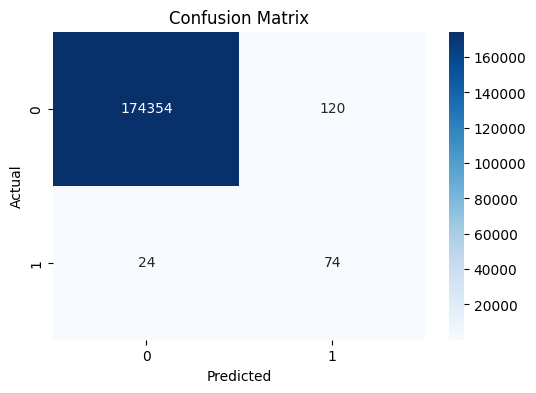

XGBoost Model:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:32:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Performance:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    174474
         1.0       0.13      0.85      0.22        98

    accuracy                           1.00    174572
   macro avg       0.56      0.92      0.61    174572
weighted avg       1.00      1.00      1.00    174572

ROC-AUC Score: 0.9218731613832645


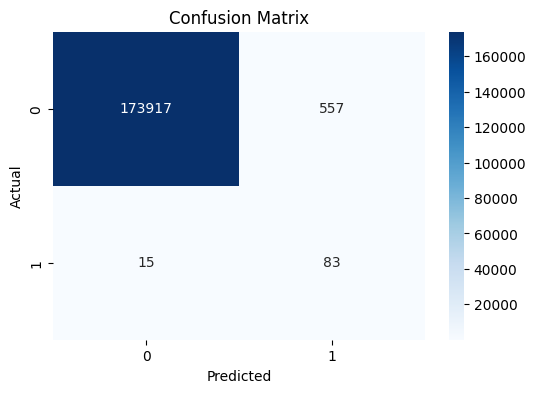

In [ ]:
# Train RandomForest & XGBoost
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest Model:")
train_and_evaluate(rf_model, X_train_resampled, y_train_resampled, X_test, y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
print("XGBoost Model:")
train_and_evaluate(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
